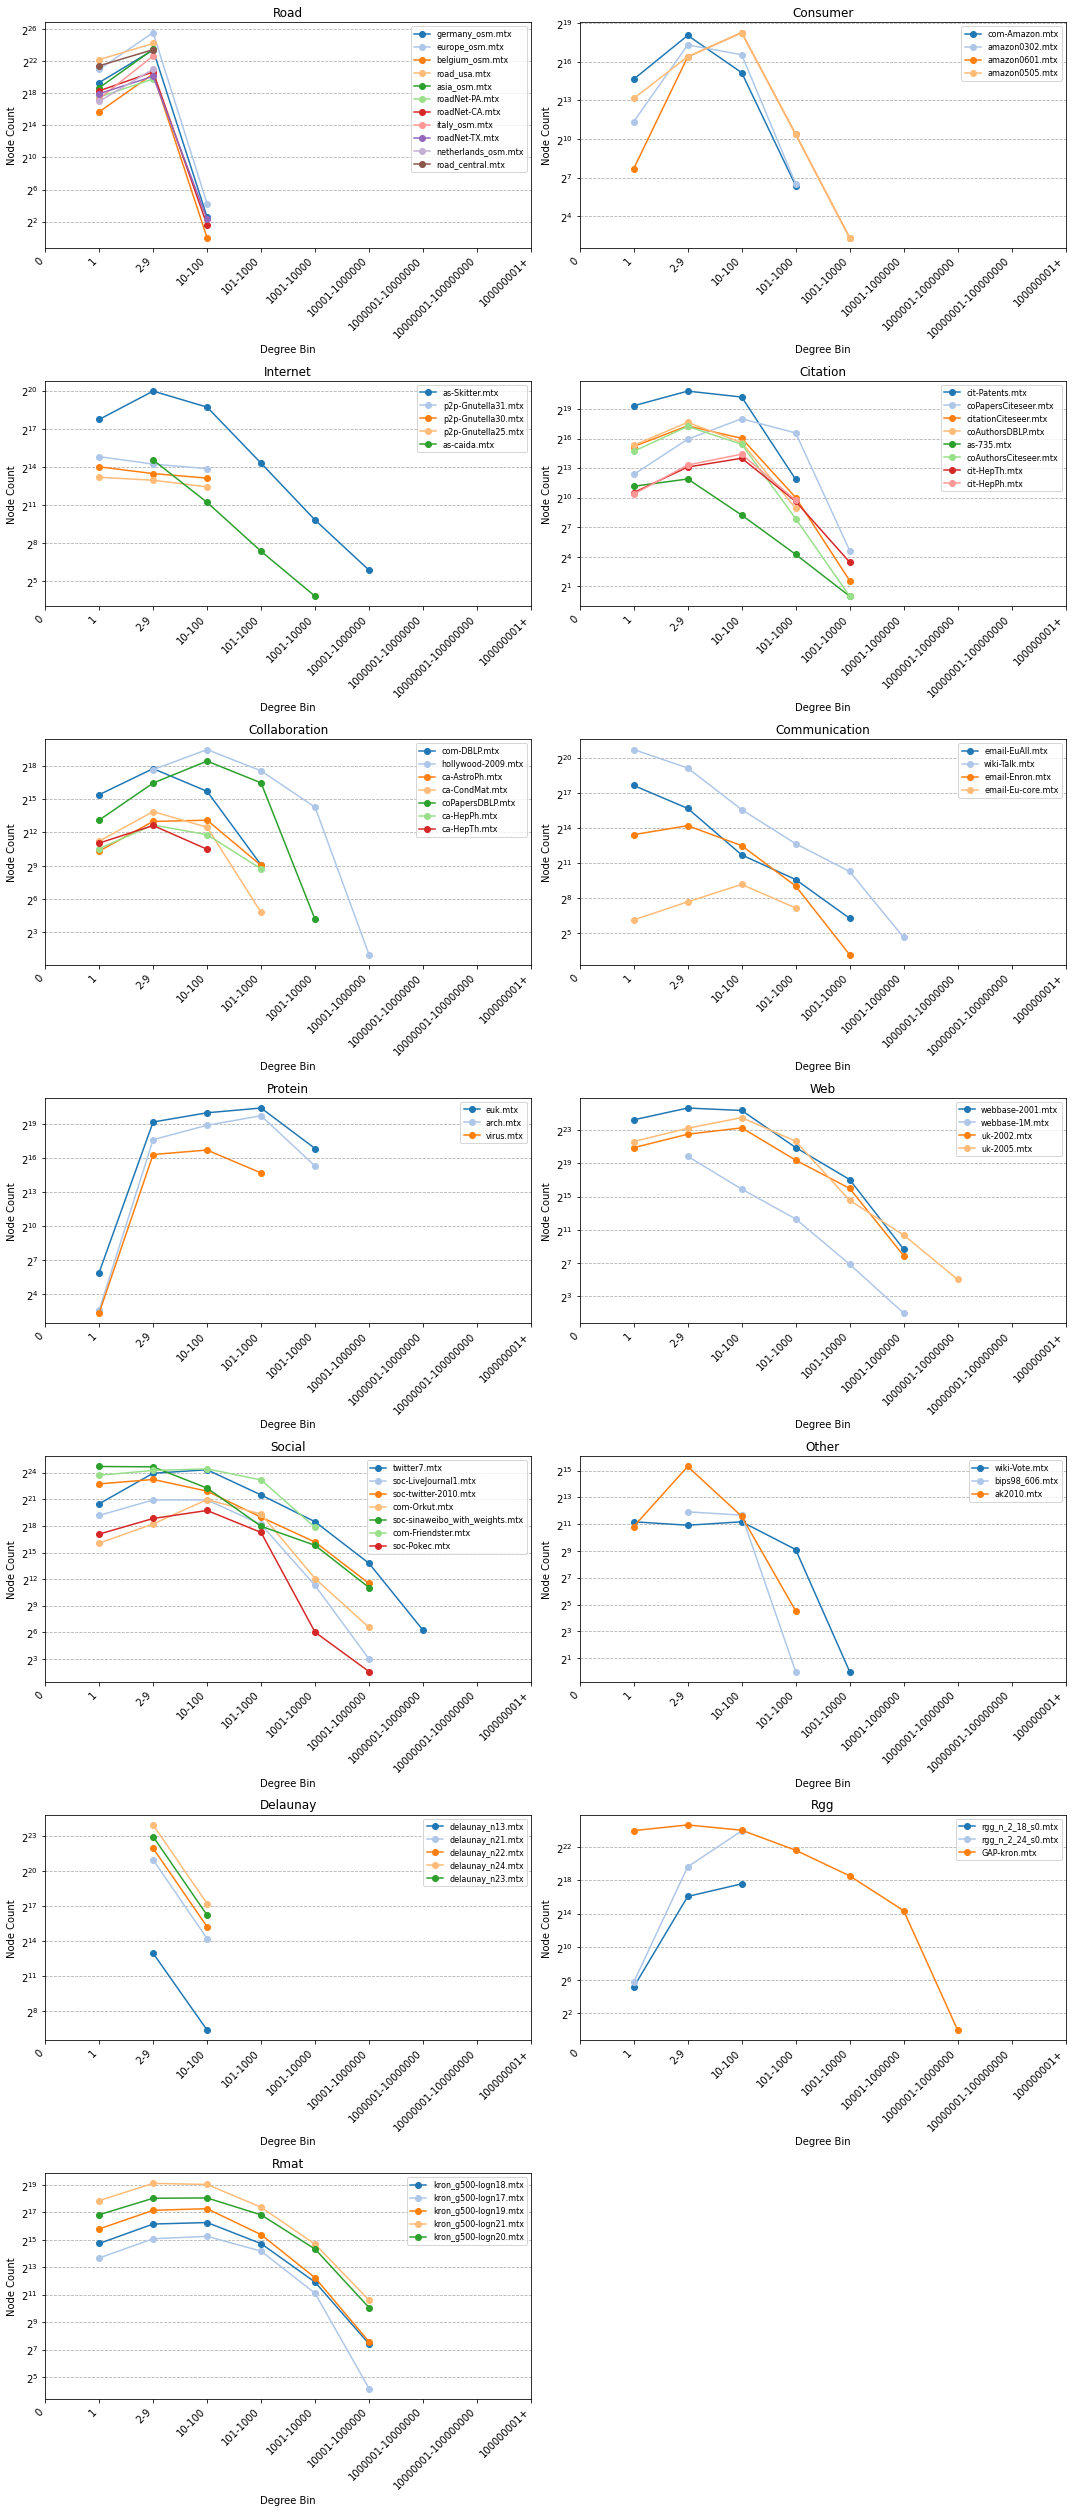

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# Load the pre-binned CSV file
file_path = 'degree_bin_stats.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Group "powersystem," "uscensus," and "wikipedia" domains into "Other" and "Kron" into "Rmat"
df['domain'] = df['domain'].replace(['PowerSystems', 'U.S.Census', 'Wiki'], 'Other')
df['domain'] = df['domain'].replace('Kron', 'Rmat')

# Define the custom domain order for subplots, capitalized
custom_domain_order = [
    "Road", "Consumer", "Internet", "Citation", "Collaboration", 
    "Communication", "Protein", "Web", "Social", "Other", "Delaunay", 
    "Rgg", "Rmat"
]

# Update degree bins based on the specified ranges
degree_bins = ["0", "1", "2-9", "10-100", "101-1000", "1001-10000", 
               "10001-1000000", "1000001-10000000", "10000001-100000000", "100000001+"]
x_positions = range(len(degree_bins))  # x positions for each degree bin

# Filter and reorder the domains based on the custom order
domains = [domain for domain in custom_domain_order if domain in df['domain'].unique()]

# Use colors from a colormap
colors = plt.cm.tab20.colors  # Colormap with enough unique colors

# Determine the number of rows and columns for subplots
n_cols = 2
n_rows = math.ceil(len(domains) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows), squeeze=False)
axes = axes.flatten()

# Loop through each domain in the custom order to create individual subplots
for i, domain in enumerate(domains):
    ax = axes[i]
    domain_data = df[df['domain'] == domain]
    unique_graphs = domain_data['filename'].unique()
    
    # Plot each graph within the domain with a unique color and marker
    for j, graph in enumerate(unique_graphs):
        graph_data = domain_data[domain_data['filename'] == graph]
        
        # Extract counts for each bin, replacing zeros with None to avoid lines connecting to the x-axis
        y_values = [count if count > 0 else None for count in graph_data[degree_bins].values.flatten()]
        
        # Plot with line and markers for each graph, skipping None values in line plotting
        ax.plot(x_positions, y_values, color=colors[j % len(colors)], label=graph, marker='o', linestyle='-')
    
    # Configure the subplot
    ax.set_yscale('log', base=2)  # Log scale for y-axis to handle large value ranges
    ax.set_xticks(x_positions)
    ax.set_xticklabels(degree_bins, rotation=45, ha="right")  # Slant the x-axis labels
    ax.set_xlabel('Degree Bin')
    ax.set_ylabel('Node Count')
    ax.set_title(f'{domain}')  # Title with only the domain name
    ax.legend(loc='upper right', fontsize=8)  # Removed the title from the legend
    ax.grid(axis='y', linestyle='--')

# Hide any unused subplots
for k in range(len(domains), len(axes)):
    fig.delaxes(axes[k])

plt.tight_layout()
plt.savefig("ordered_binned_line_plots_by_domain.pdf", bbox_inches="tight")
plt.show()
